In [4]:
from models.construir_red import construir_red_global_usuarios
import networkx as nx
G=construir_red_global_usuarios()
componentes = nx.connected_components(G)
componentes_conexas = [G.subgraph(c).copy() for c in componentes]
subgrafo_gigante=componentes_conexas[0]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import pandas as pd
import os
from itertools import combinations
from datetime import datetime
import seaborn as sb
from collections import Counter
from scipy.stats import linregress
def logbin_pdf(data, nbin=100, yinf=1e-6):

    mini, maxi= min(data), max(data)

    bines = np.logspace(np.log10(mini), np.log10(maxi), nbin)
   

    counts, bines = np.histogram( data, bins=bines, density=True )

    x,y = [ bines[i]+(bines[i+1]-bines[i])*0.5 for i in range(len(bines)-1) ], counts

    x = np.array(x)
    y = np.array(y)

    x = x[y>yinf]
    y = y[y>yinf]

    return x,y
# --- Paleta Moderna ---
colors = {
    "red":      "#E74C3C",
    "pink":     "#E84393",
    "purple":   "#6C5CE7",
    "blue":     "#3498DB",
    "cyan":     "#00CEC9",
    "green":    "#2ECC71",
    "lime":     "#55EFC4",
    "yellow":   "#F1C40F",
    "orange":   "#E67E22",
    "gray":     "#95A5A6",
    "dark":     "#2C3E50"
}

# Distribucion de Grados

El grado promedio es de 517.74 y el desvío estándar es 571.67
Exponente gamma ≈ 0.73
R² del ajuste: 0.948


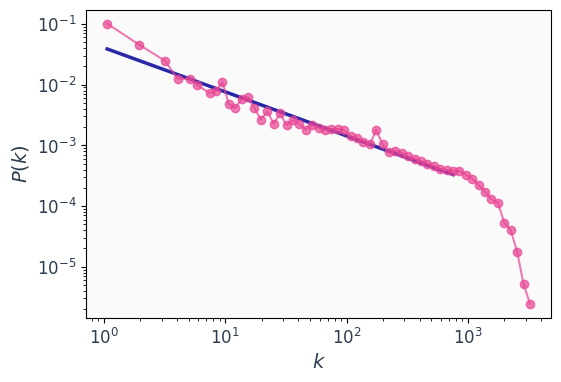

In [50]:
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)

grados = [d for _, d in subgrafo_gigante.degree()]
mediana=np.median(grados)
media = np.mean(grados)
desvio = np.std(grados)

print(f"El grado promedio es de {media:.2f} y el desvío estándar es {desvio:.2f}")

# --- Distribución log-bineada ---
x, y = logbin_pdf(grados, nbin=70)
x_reg=x[:45]
y_reg=y[:45]
logx = np.log10(x_reg)
logy = np.log10(y_reg)


# --- Ajuste lineal (log-log) ---
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)

# Parámetro gamma de la ley de potencias
alpha = -slope
print(f"Exponente gamma ≈ {alpha:.2f}")
print(f"R² del ajuste: {r_value**2:.3f}")

# Función power-law
pwl = lambda x, c, alpha: c * np.power(x, -alpha)
c = np.power(10, intercept)

# --- Plot ---
plt.figure(figsize=(6,4))

# --- Curva del ajuste power-law ---
plt.plot(
    x_reg, pwl(x_reg, c, alpha), 
    linewidth=2.5, 
    color="#2828A6",       # azul suave"
)

# Curva principal (datos empíricos)
plt.plot(
    x, y, "o-", 
    color=colors["pink"],      # color moderno
    markersize=6,
    markerfacecolor=colors["pink"],
    label="Datos empíricos",
    alpha=0.7
)

# Estilo del fondo
ax = plt.gca()
ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design

# Etiquetas y estilo de ejes
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$P(k)$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=12, color=colors["dark"])
plt.yticks(fontsize=12, color=colors["dark"])


filename='distribucion_grados.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

# Distribucion pesos

106 2133363
El grado promedio es de 1.74 y el desvío estándar es 2.06
Exponente gamma ≈ 3.72
R² del ajuste: 0.992


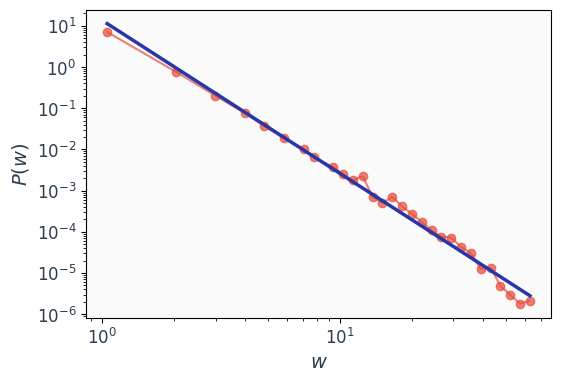

In [83]:
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)

pesos_dict = nx.get_edge_attributes(subgrafo_gigante, 'weight')
w=list(pesos_dict.values())
w.reverse()
print(max(w),len(w))
media = np.mean(w)
desvio = np.std(w)
mediana=np.median(w)

print(f"El grado promedio es de {media:.2f} y el desvío estándar es {desvio:.2f}")

# --- Distribución log-bineada ---
x, y = logbin_pdf(w, nbin=50)
x_reg=x
y_reg=y
logx = np.log10(x)
logy = np.log10(y)


# --- Ajuste lineal (log-log) ---
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)

# Parámetro gamma de la ley de potencias
alpha = -slope
print(f"Exponente gamma ≈ {alpha:.2f}")
print(f"R² del ajuste: {r_value**2:.3f}")

# Función power-law
pwl = lambda x, c, alpha: c * np.power(x, -alpha)
c = np.power(10, intercept)

# --- Plot ---
plt.figure(figsize=(6,4))

# Curva principal (datos empíricos)
plt.plot(
    x, y, "o-", 
    color=colors["red"],      # color moderno
    markersize=6,
    markerfacecolor=colors["red"],
    label="Datos empíricos",
    alpha=0.7
)
# --- Curva del ajuste power-law ---
plt.plot(
    x_reg, pwl(x_reg, c, alpha), 
    linewidth=2.5, 
    color="#2837A6"       # azul suave
)

# Estilo del fondo
ax = plt.gca()
ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design

# Etiquetas y estilo de ejes
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$w$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$P(w)$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=12, color=colors["dark"])
plt.yticks(fontsize=12, color=colors["dark"])

filename='distribucion_pesos.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

# Betweenness Centrality

In [36]:
bet = nx.betweenness_centrality(subgrafo_gigante,weight='weight',k=500)

In [85]:
with open("centrality_bet_usuario.json", "w", encoding="utf-8") as f:
    json.dump(bet, f, indent=2)

El betweenness centrality promedio es de 0.00 y el desvío estándar es 0.00
Exponente gamma ≈ 0.67
R² del ajuste: 0.975


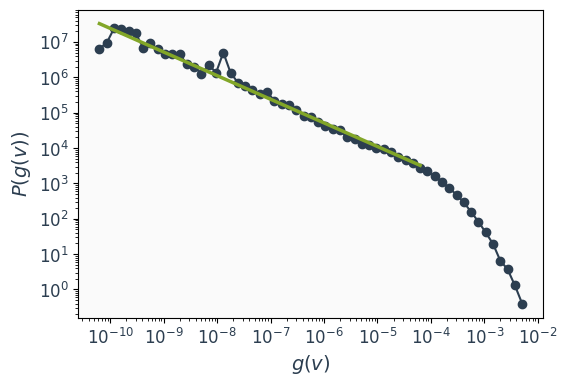

In [58]:
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)

# --- Betweenness centrality (valores positivos) ---
bc_values = list(bet.values())
bc_values_pos = [v for v in bc_values if v > 0]

# --- Estadísticos básicos ---
mediana=np.median(bc_values_pos)
media = np.mean(bc_values_pos)
desvio = np.std(bc_values_pos)
print(f"El betweenness centrality promedio es de {media:.2f} y el desvío estándar es {desvio:.2f}")

# --- Distribución log-bineada ---
x_bc, y_bc = logbin_pdf(bc_values_pos, nbin=60)

# --- Ajuste lineal en escala log-log ---
x_reg=x_bc[:45]
y_reg=y_bc[:45]
logx = np.log10(x_reg)
logy = np.log10(y_reg)
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)

# Parámetro gamma (ley de potencias)
alpha = -slope
print(f"Exponente gamma ≈ {alpha:.2f}")
print(f"R² del ajuste: {r_value**2:.3f}")

# --- Función power-law ---
pwl = lambda x, c, alpha: c * np.power(x, -alpha)
c = np.power(10, intercept)

# --- Plot ---
plt.figure(figsize=(6,4))

# Curva principal (datos empíricos)
plt.plot(
    x_bc, y_bc, "o-", 
    color=colors["dark"],      # color moderno
    markersize=6,
    markerfacecolor=colors["dark"],
    label="Datos empíricos"
)
# --- Curva del ajuste power-law ---
plt.plot(
    x_reg, pwl(x_reg, c, alpha), 
    linewidth=2.5, 
    color="#82A628",       # azul suave
)

# Estilo del fondo
ax = plt.gca()
ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design
plt.xscale("log")
plt.yscale("log")

# Etiquetas y estilo de ejes
plt.xlabel(r"$g(v)$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$P(g(v))$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=12, color=colors["dark"])
plt.yticks(fontsize=12, color=colors["dark"])



filename='distribucion_btw.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()


# EigenVector Centrality

In [11]:
centrality=nx.eigenvector_centrality(subgrafo_gigante,weight='weight')

In [84]:
with open("centrality_eigenvector_usuario.json", "w", encoding="utf-8") as f:
    json.dump(centrality, f, indent=2)

43 43
Exponente gamma ≈ 0.58
R² del ajuste: 0.984


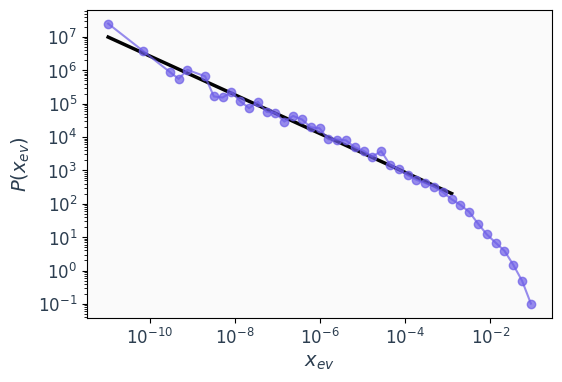

In [54]:
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)

c_values=list(centrality.values())
mediana=np.median(c_values)
media = np.mean(c_values)
desvio = np.std(c_values)

# --- Distribución log-bineada ---
x_ev, y_ev = logbin_pdf(c_values, nbin=50)
print(len(x_ev),len(y_ev))
x_reg=x_ev[:34]
y_reg=y_ev[:34]
logx = np.log10(x_reg)
logy = np.log10(y_reg)


# --- Ajuste lineal (log-log) ---
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)

# Parámetro gamma de la ley de potencias
alpha = -slope
print(f"Exponente gamma ≈ {alpha:.2f}")
print(f"R² del ajuste: {r_value**2:.3f}")

pwl = lambda x, c, alpha: c * np.power(x, -alpha)
c = np.power(10, intercept)

# --- Plot ---
plt.figure(figsize=(6,4))


# --- Curva del ajuste power-law ---
plt.plot(
    x_reg, pwl(x_reg, c, alpha), 
    linewidth=2.5, 
    color="#020202",       # azul suave
)
# Curva principal (datos empíricos)
plt.plot(
    x_ev, y_ev, "o-", 
    color=colors["purple"],      # color moderno
    markersize=6,
    markerfacecolor=colors["purple"],
    label="Datos empíricos",
    alpha=0.7
)

# Estilo del fondo
ax = plt.gca()
ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design
plt.xscale('log')
plt.yscale('log')
# Etiquetas y estilo de ejes
plt.xlabel(r"$x_{ev}$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$P(x_{ev})$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=12, color=colors["dark"])
plt.yticks(fontsize=12, color=colors["dark"])



filename='distribucion_eigenvector.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

# Clustering

In [17]:
c_c=nx.clustering(subgrafo_gigante,weight='weight')

In [ ]:
with open("centrality_clustering_usuario.json", "w", encoding="utf-8") as f:
    json.dump(c_c, f, indent=2)

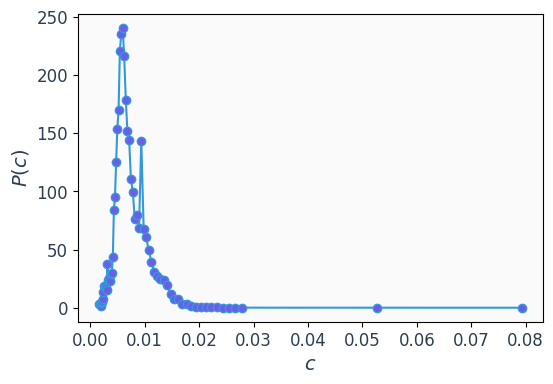

In [57]:
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)

c_c_valores=list(c_c.values())
c_c_valores_positivos=[]
cantidad_ceros=0
for val in c_c_valores:
    if val == 0:
        cantidad_ceros+=1
    else:
        c_c_valores_positivos.append(val)
x_clus,y_clus=logbin_pdf(c_c_valores_positivos,nbin=100)
media=np.mean(x_clus)
mediana=np.median(x_clus)

# --- Plot ---
plt.figure(figsize=(6,4))

# Curva principal (datos empíricos)
plt.plot(
    x_clus, y_clus, "o-", 
    color=colors["blue"],      # color moderno
    markersize=6,
    markerfacecolor=colors["purple"],
    label="Datos empíricos"
)


# Estilo del fondo
ax = plt.gca()
ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design

# Etiquetas y estilo de ejes
plt.xlabel(r"$c$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$P(c)$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=12, color=colors["dark"])
plt.yticks(fontsize=12, color=colors["dark"])

filename='distribucion_clustering.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()


## EigenVector VS BTW

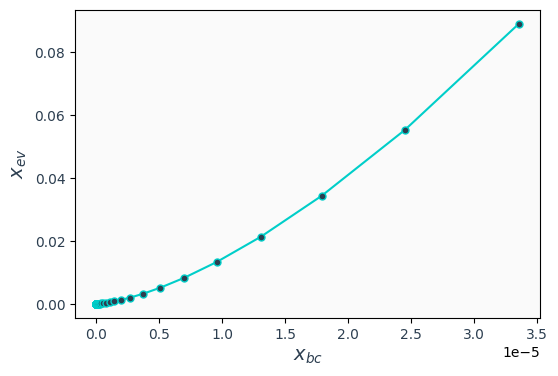

In [59]:
n=min(len(x_bc),len(x_ev))
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor("#FAFAFA")
plt.plot(
    x_bc[:n], x_ev[:n], "o-", 
    color=colors["cyan"],      # color moderno
    markersize=5,
    markerfacecolor=colors["dark"],
)
plt.xlabel(r"$x_{bc}$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$x_{ev}$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=10, color=colors["dark"])
plt.yticks(fontsize=10, color=colors["dark"])
filename='EigenvectorVSbtw.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

## EigenVector vs Clustering

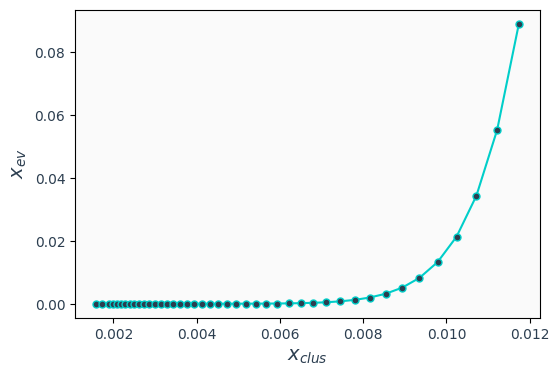

In [60]:
n=min(len(x_clus),len(x_ev))
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor("#FAFAFA")
plt.plot(
    x_clus[:n], x_ev[:n], "o-", 
    color=colors["cyan"],      # color moderno
    markersize=5,
    markerfacecolor=colors["dark"],
)
plt.xlabel(r"$x_{clus}$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$x_{ev}$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=10, color=colors["dark"])
plt.yticks(fontsize=10, color=colors["dark"])

filename='EigenvectorVSclustering.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

## BTW vs Clustering

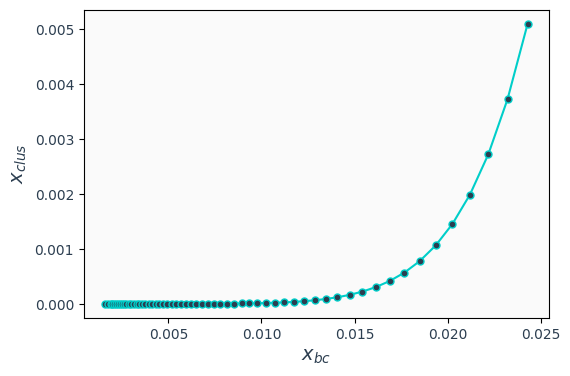

In [61]:
n=min(len(x_clus),len(x_bc))
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor("#FAFAFA")
plt.plot(
    x_clus[:n], x_bc[:n], "o-", 
    color=colors["cyan"],      # color moderno
    markersize=5,
    markerfacecolor=colors["dark"],
)
plt.xlabel(r"$x_{bc}$", fontsize=14, color=colors["dark"])
plt.ylabel(r"$x_{clus}$", fontsize=14, color=colors["dark"])
plt.xticks(fontsize=10, color=colors["dark"])
plt.yticks(fontsize=10, color=colors["dark"])

filename='BTWVSclustering.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [20]:
print(cantidad_ceros)

120


## Deteccion de Comunidades

-------------------------------------------------
Cantidad total de comunidades: 9
Modularidad total (Q): 0.3636
Tamaño de cada comunidad:
 - Comunidad 0: 866 nodos
 - Comunidad 1: 1071 nodos
 - Comunidad 2: 173 nodos
 - Comunidad 3: 60 nodos
 - Comunidad 4: 1574 nodos
 - Comunidad 5: 1693 nodos
 - Comunidad 6: 299 nodos
 - Comunidad 7: 82 nodos
 - Comunidad 8: 2423 nodos
-------------------------------------------------



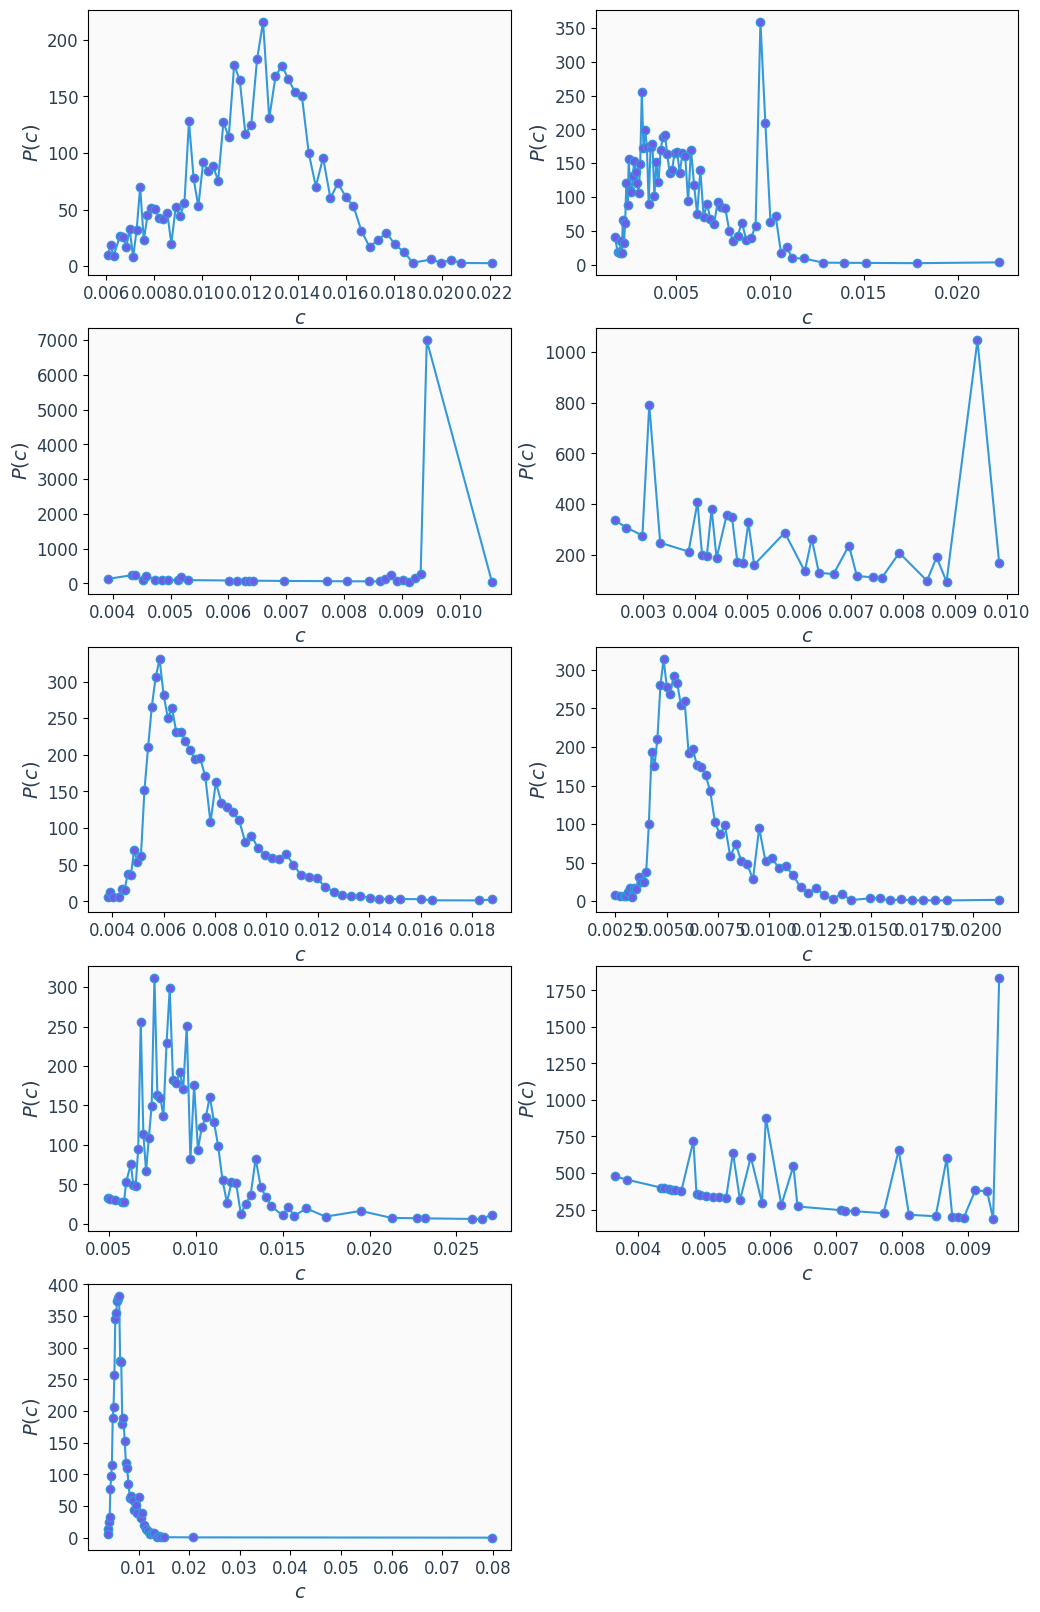

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms.community import modularity

# Obtener comunidades mediante Louvain
comunidades = nx.algorithms.community.louvain_communities(subgrafo_gigante,weight='weight')

# Calcular modularidad
Q = modularity(subgrafo_gigante, comunidades)

# Print informativo
print("-------------------------------------------------")
print(f"Cantidad total de comunidades: {len(comunidades)}")
print(f"Modularidad total (Q): {Q:.4f}")
print("Tamaño de cada comunidad:")
for i, comunidad in enumerate(comunidades):
    print(f" - Comunidad {i}: {len(comunidad)} nodos")
print("-------------------------------------------------\n")

# Graficar distribuciones de clustering por comunidad
n = len(comunidades)
cols = 2
rows = int(np.ceil(n / cols))
output_dir = "metricas_red_usuarios"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(12, 4 * rows))

for i, comunidad in enumerate(comunidades):
    plt.subplot(rows, cols, i + 1)

    # Valores de clustering dentro de cada comunidad
    clust_vals = [c_c[node] for node in comunidad if c_c[node]!=0]
    x, y = logbin_pdf(clust_vals, nbin=100)
    # Curva principal (datos empíricos)
    plt.plot(
    x, y, "o-", 
    color=colors["blue"],      # color moderno
    markersize=6,
    markerfacecolor=colors["purple"],
    label="Datos empíricos"
    )
        # Estilo del fondo
    ax = plt.gca()
    ax.set_facecolor("#FAFAFA")  # gris muy claro tipo material design

    # Etiquetas y estilo de ejes
    plt.xlabel(r"$c$", fontsize=14, color=colors["dark"])
    plt.ylabel(r"$P(c)$", fontsize=14, color=colors["dark"])
    plt.xticks(fontsize=12, color=colors["dark"])
    plt.yticks(fontsize=12, color=colors["dark"])



filename='distribucion_clustering_comunidades.pdf'
plt.savefig(os.path.join(output_dir, filename), format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [67]:
print(comunidades[0])

{'A24com_WN_dVNWHQqo', 'Todo Noticias_qeNDKTCtyi8', 'Todo Noticias_l57JLUeG13A', 'A24com_7gOWt7x9C_A', 'A24com_Tl1PX2dSqBs', 'eldoce_GBzgcwi29hY', 'Telefe Noticias_vdXZ8miS-kY', 'Canal 26_ooQF9RFTAHg', 'A24com_OWmmWvF_o2s', 'Telefe Noticias_hc0q4ghBh6g', 'A24com_Hdgt7ldAAcA', 'Telefe Noticias_hJB9o3iAKTw', 'eldoce_ZCzZcFZMSo0', 'Radio Mitre_s0Kd4RHfAUA', 'Todo Noticias_KqOo3uOgxpk', 'Telefe Noticias_wPmkAsPViJM', 'Canal 26_H8Rl1vkQIDU', 'A24com_GgWSoQonxTo', 'Todo Noticias_gF6btato-X0', 'Todo Noticias_3wH-MRme2P4', 'Telefe Noticias_LSzgfgnGAOI', 'LA NACION_M4vclVMZ2eI', 'Infobae_WW4dDNCaTto', 'LA NACION_aiuRr_2dacA', 'Todo Noticias_hn6ptjAu6hA', 'Canal 26_ymoB98ua70E', 'Todo Noticias_Ct6Rs-4GhH8', 'Todo Noticias_QK_VkZysobE', 'Infobae_QjetoN2ayoM', 'Telefe Noticias_BcLyI49Ml70', 'Infobae_751mY90NNe8', 'C5N_S_IqLlJHprE', 'Canal 26_ySr0fPpSYhE', 'Telefe Noticias_YTsAkYQJD_A', 'Radio Mitre_Qv2ZCQqSn3U', 'LA NACION_FiNVk1ZOXaM', 'Infobae_ONfbg3yScFQ', 'LA NACION_Bo3QGJtpodk', 'Infobae_FbKi

-------------------------------------------------
Cantidad total de comunidades: 9
Modularidad total (Q): 0.3636
Tamaño de cada comunidad:
 - Comunidad 0: 2444 nodos
 - Comunidad 1: 1649 nodos
 - Comunidad 2: 1590 nodos
 - Comunidad 3: 1070 nodos
 - Comunidad 4: 868 nodos
 - Comunidad 5: 299 nodos
 - Comunidad 6: 173 nodos
 - Comunidad 7: 88 nodos
 - Comunidad 8: 60 nodos
-------------------------------------------------



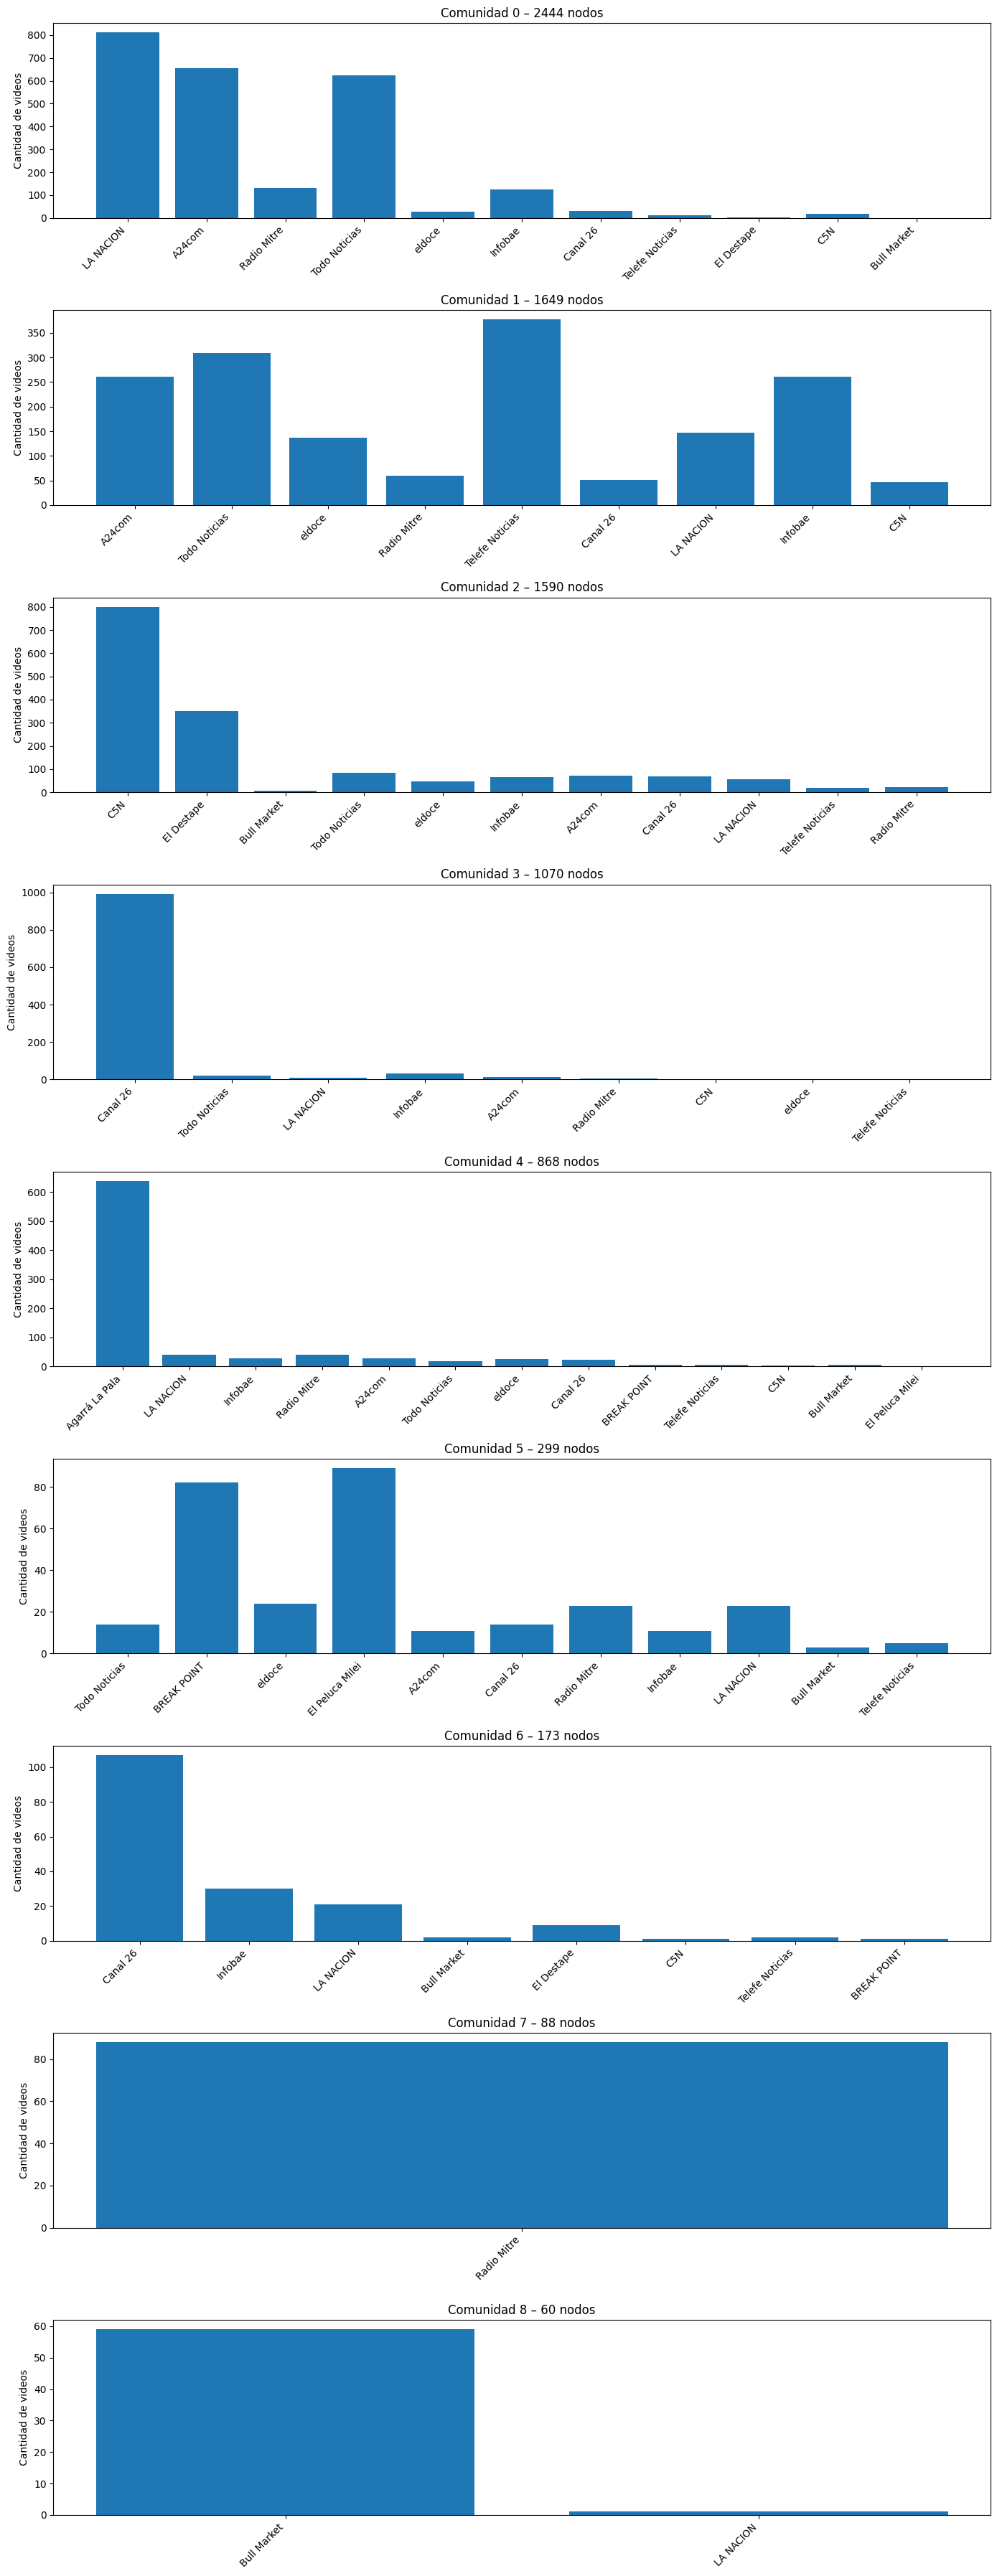

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter
import os
def extraer_canal(nodo: str) -> str:
    """Devuelve el nombre del canal de un nodo con formato canal_id."""
    return nodo.split("_")[0]
# --- 1. Detectar comunidades ---
comunidades = nx.algorithms.community.louvain_communities(
    subgrafo_gigante,
    weight='weight'
)
# Ordenar comunidades por tamaño
comunidades = sorted(comunidades, key=lambda c: len(c), reverse=True)
# Calcular modularidad
Q = modularity(subgrafo_gigante, comunidades)

# Print informativo
print("-------------------------------------------------")
print(f"Cantidad total de comunidades: {len(comunidades)}")
print(f"Modularidad total (Q): {Q:.4f}")
print("Tamaño de cada comunidad:")
for i, comunidad in enumerate(comunidades):
    print(f" - Comunidad {i}: {len(comunidad)} nodos")
print("-------------------------------------------------\n")


# Crear carpeta de salida
output_dir = "metricas_canal_por_comunidad"
os.makedirs(output_dir, exist_ok=True)

# --- 2. Graficar distribución de canales por comunidad ---
plt.figure(figsize=(14, 4 * len(comunidades)))

for i, comunidad in enumerate(comunidades):

    # Extraer canal de cada nodo
    canales = [extraer_canal(nodo) for nodo in comunidad]

    # Contar frecuencia
    conteo = Counter(canales)

    # Ordenar canales por frecuencia
    canales_orden = list(conteo.keys())
    freqs = list(conteo.values())

    plt.subplot(len(comunidades), 1, i+1)
    plt.bar(canales_orden, freqs)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Cantidad de videos")
    plt.title(f"Comunidad {i} – {len(comunidad)} nodos")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "canales_por_comunidad.pdf"),
            format='pdf', bbox_inches='tight')
plt.show()
plt.close()

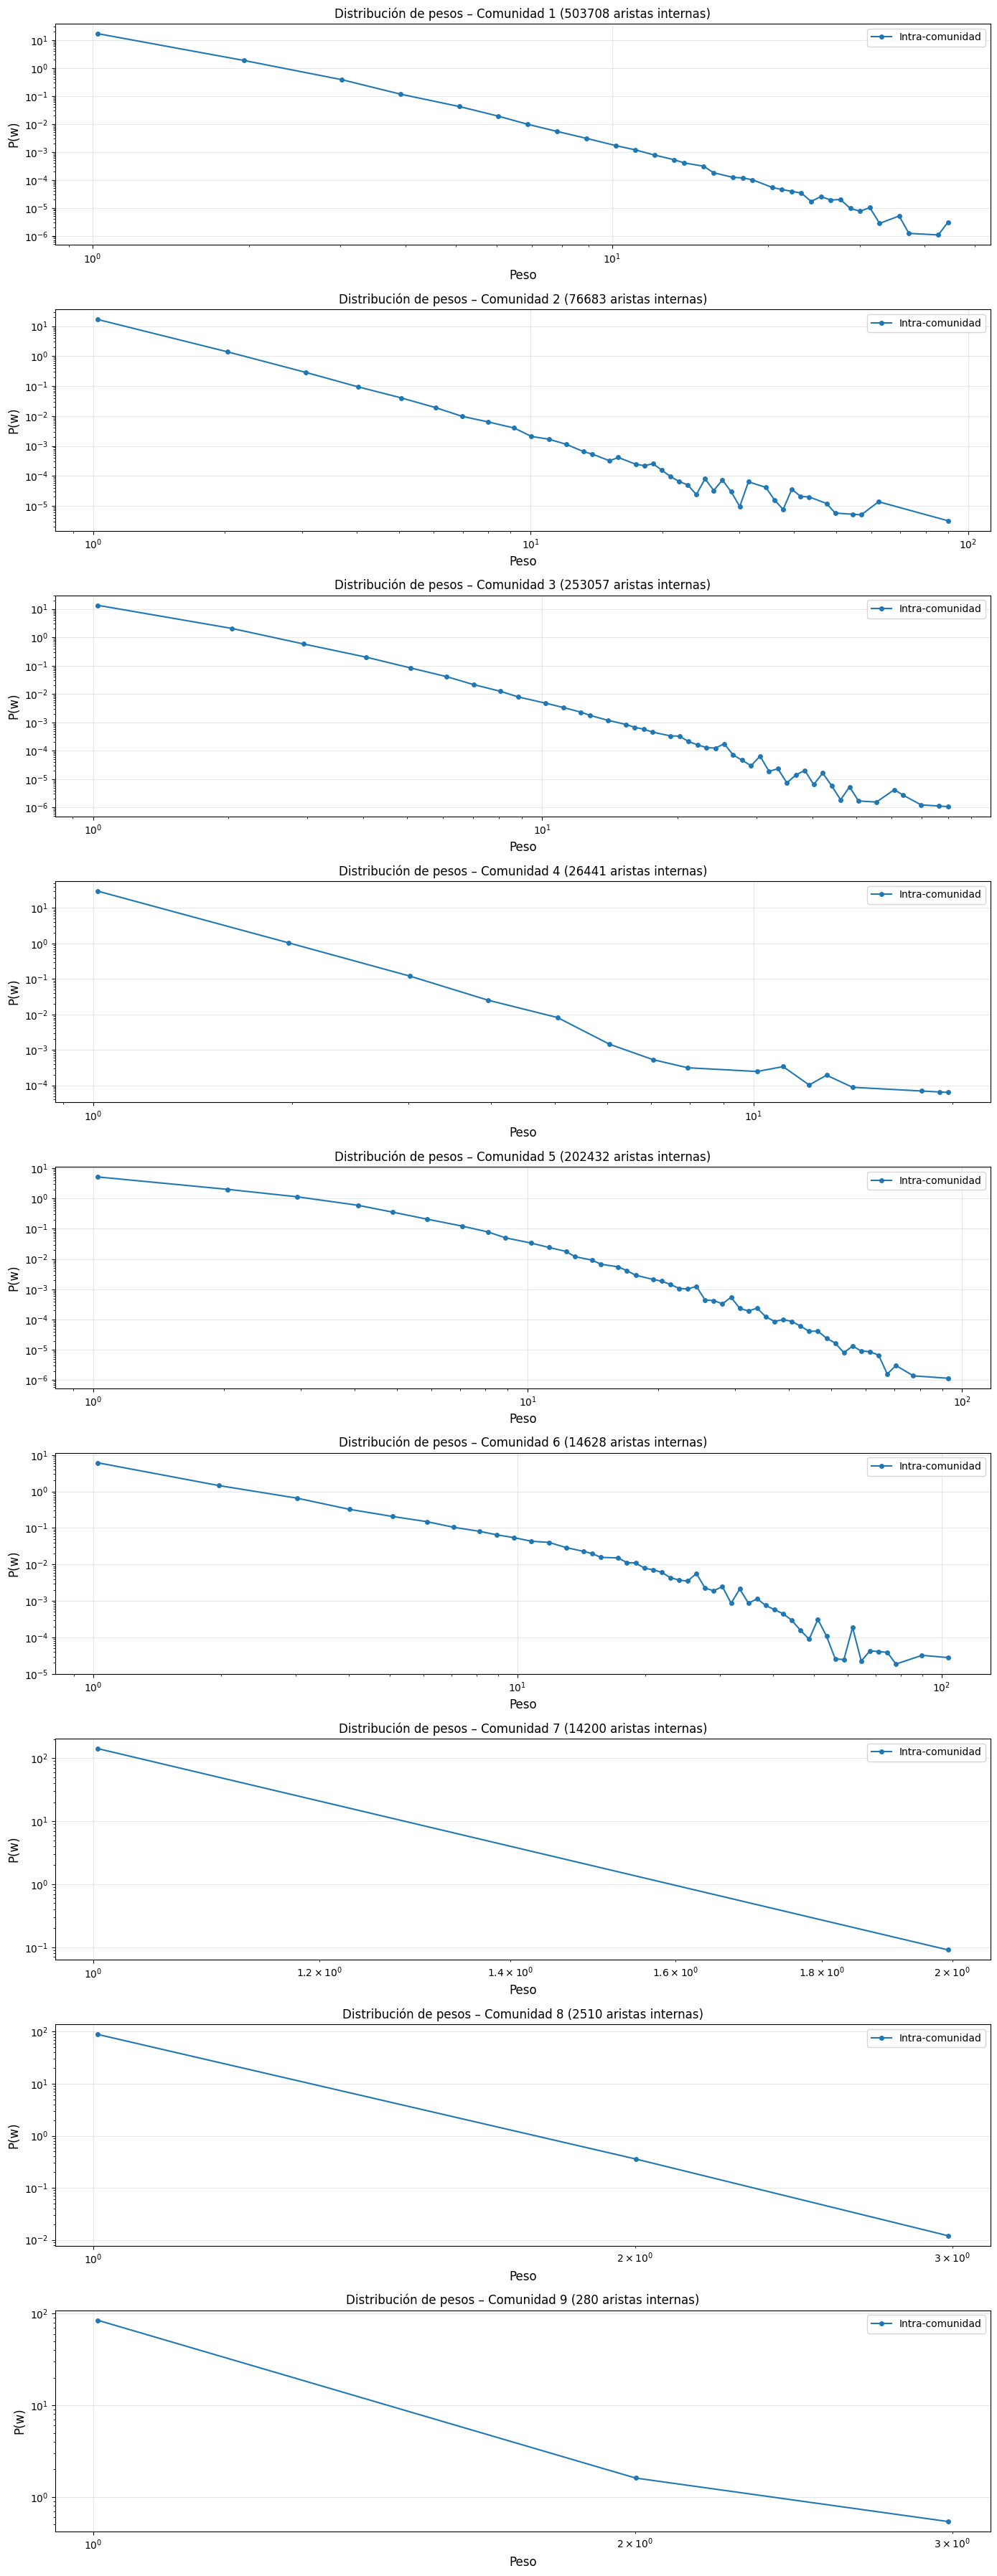

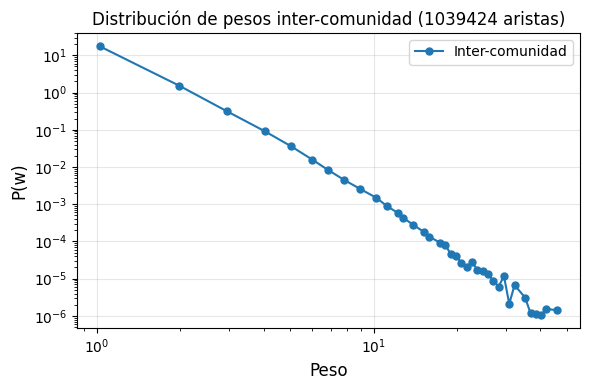

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter
import os

# ===========================================================
# 0. Mapeo nodo → comunidad
# ===========================================================
comunidad_id = {}
for i, com in enumerate(comunidades):
    for nodo in com:
        comunidad_id[nodo] = i


# ===========================================================
# 1. Distribución de pesos por comunidad (solo intra)
# ===========================================================
output_dir_pesos = "metricas_pesos_por_comunidad"
os.makedirs(output_dir_pesos, exist_ok=True)

plt.figure(figsize=(14, 4 * len(comunidades)))

for i, comunidad in enumerate(comunidades):

    set_com = set(comunidad)
    pesos_intra = []

    # Buscar SOLO aristas internas de la comunidad
    for u, v, data in subgrafo_gigante.edges(data=True):
        w = data.get("weight", None)
        if w is None:
            continue

        cu = comunidad_id[u]
        cv = comunidad_id[v]

        # arista dentro de la comunidad i
        if cu == i and cv == i:
            pesos_intra.append(w)

    plt.subplot(len(comunidades), 1, i + 1)

    if len(pesos_intra) > 0:
        # plt.hist(pesos_intra)
        x, y = logbin_pdf(pesos_intra, nbin=100)
        plt.plot(x, y, "o-", markersize=4, label="Intra-comunidad")
        plt.xscale('log')
        plt.yscale('log')
    else:
        plt.text(0.5, 0.5, "No hay aristas internas", ha="center")
    
    plt.xlabel("Peso", fontsize=12)
    plt.ylabel("P(w)", fontsize=12)
    plt.title(f"Distribución de pesos – Comunidad {i+1} ({len(pesos_intra)} aristas internas)")
    plt.grid(alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir_pesos, "pesos_intra_por_comunidad_logbin.pdf"),
            format='pdf', bbox_inches='tight')
plt.show()
plt.close()


# ===========================================================
# 2. Distribución de pesos inter-comunidad (todas juntas)
# ===========================================================
pesos_inter_global = []

for u, v, data in subgrafo_gigante.edges(data=True):

    w = data.get("weight", None)
    if w is None:
        continue

    cu = comunidad_id[u]
    cv = comunidad_id[v]

    # Si conectan comunidades distintas
    if cu != cv:
        pesos_inter_global.append(w)

# ---- Graficar inter-comunidad ----
plt.figure(figsize=(6, 4))

if len(pesos_inter_global) > 0:
    # plt.hist(pesos_inter_global)
    xg, yg = logbin_pdf(pesos_inter_global, nbin=100)
    plt.plot(xg, yg, "o-", markersize=5, label="Inter-comunidad")
    plt.xscale('log')
    plt.yscale('log')
else:
    plt.text(0.5, 0.5, "No hay aristas inter-comunidad", ha="center")

plt.xlabel("Peso", fontsize=12)
plt.ylabel("P(w)", fontsize=12)
plt.title(f"Distribución de pesos inter-comunidad ({len(pesos_inter_global)} aristas)")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir_pesos, "pesos_inter_comunidad_logbin.pdf"),
            format='pdf', bbox_inches='tight')
plt.show()
plt.close()


## Clustering vs degree

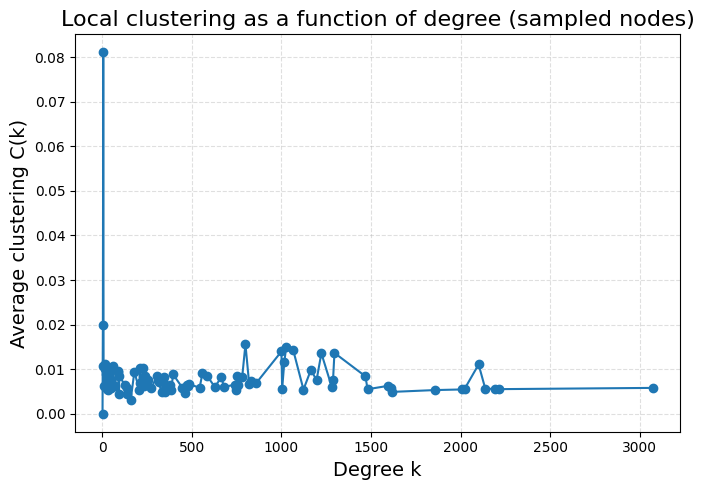

In [65]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

# ======================================================
# 0. Elegir tamaño de la submuestra
# ======================================================
sample_size = 100   # <-- Cambiá este número según necesites

# Lista de nodos en el subgrafo gigante
all_nodes = list(subgrafo_gigante.nodes())

# Submuestra aleatoria sin reemplazo
sample_nodes = random.sample(all_nodes, min(sample_size, len(all_nodes)))

# ======================================================
# 1. Clustering local (usar c_c ya calculado)
# ======================================================
# c_c[node] debe ser el clustering de toda la red o del subgrafo

# ======================================================
# 2. Grado de cada nodo (solo usamos sample_nodes)
# ======================================================
degrees = dict(subgrafo_gigante.degree())  # {nodo: k}

# ======================================================
# 3. Agrupamos clustering por grado usando SOLO los nodos sampleados
# ======================================================
clust_by_k = defaultdict(list)

for node in sample_nodes:
    k = degrees[node]
    clust_by_k[k].append(c_c[node])

# ======================================================
# 4. Promedio C(k)
# ======================================================
k_vals = sorted(clust_by_k.keys())
Ck_vals = [np.mean(clust_by_k[k]) for k in k_vals]

# ======================================================
# 5. Plot
# ======================================================
plt.figure(figsize=(7,5))

plt.plot(k_vals, Ck_vals, "o-", markersize=6)

plt.xlabel("Degree k", fontsize=14)
plt.ylabel("Average clustering C(k)", fontsize=14)
plt.title("Local clustering as a function of degree (sampled nodes)", fontsize=16)

plt.grid(True, which="both", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



# Grafo de Canales

In [ ]:
from models.construir_red import construir_red_usuarios_canales